In [1]:
import gnn
import helper_funcs
import torch
from torch_geometric.datasets import TUDataset
from torch_geometric.datasets import Planetoid
import matplotlib.pyplot as plt

In [9]:
# import cora dataset only
cora_dataset = Planetoid(root='/tmp/Cora', name='Cora')
EPOCHS = 100

# GAT

In [3]:
def mod_layers_GAT(dataset, layers):
    hidden_channels = 32
    model = gnn.GATNode(dataset.num_features, hidden_channels,
                dataset.num_classes, 4, layers)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)
    test_acc = 0 
    for _ in range(EPOCHS):
        _ = gnn.GATNode_train(model, optimizer, dataset)
        _, _, test_acc = gnn.GATNode_test(model, dataset)
    return test_acc

In [4]:
# dictionary of layer # : test accurarcy on CORA dataset
gat_layer_performance = {layer_num: mod_layers_GAT(cora_dataset, layer_num) for layer_num in range(2, 30)}
print(gat_layer_performance)

{2: 0.808, 3: 0.773, 4: 0.765, 5: 0.792, 6: 0.764, 7: 0.748, 8: 0.74, 9: 0.767, 10: 0.767, 11: 0.755, 12: 0.76, 13: 0.733, 14: 0.77, 15: 0.728, 16: 0.713, 17: 0.553, 18: 0.515, 19: 0.221, 20: 0.697, 21: 0.144, 22: 0.176, 23: 0.146, 24: 0.53, 25: 0.136, 26: 0.064, 27: 0.144, 28: 0.144, 29: 0.157}


Graphs to visualize test accurarcy change as layer numbers change for GAT

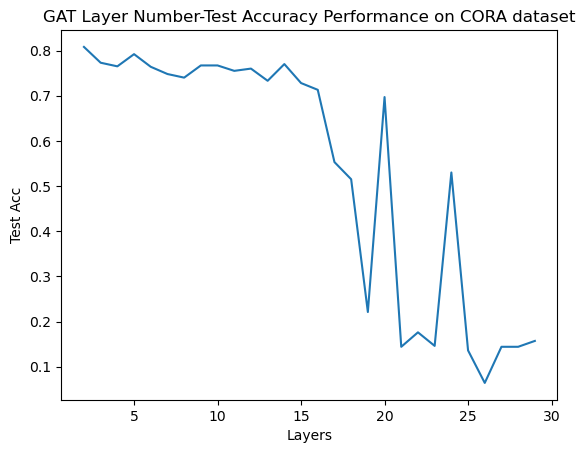

In [5]:
layers, acc = gat_layer_performance.keys(), gat_layer_performance.values()
plt.plot(layers, acc)
plt.title('GAT Layer Number-Test Accuracy Performance on CORA dataset')
plt.xlabel('Layers')
plt.ylabel('Test Acc')
plt.show()

# GCN

In [10]:
def mod_layers_GCN(dataset, layers):
    hidden_channels = 32
    model = gnn.GCN(dataset.num_features, hidden_channels,
                dataset.num_classes, layers)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)
    test_acc = 0 
    for _ in range(EPOCHS):
        _ = gnn.train_gcn(model, dataset, optimizer)
        _, _, test_acc = gnn.test_gcn(model, dataset)
    return test_acc

In [11]:
# dictionary of layer # : test accurarcy on CORA dataset
gcn_layer_performance = {layer_num: mod_layers_GCN(cora_dataset, layer_num) for layer_num in range(2, 30)}
print(gcn_layer_performance)

{2: 0.806, 3: 0.793, 4: 0.792, 5: 0.784, 6: 0.793, 7: 0.748, 8: 0.7, 9: 0.635, 10: 0.694, 11: 0.363, 12: 0.402, 13: 0.485, 14: 0.618, 15: 0.436, 16: 0.153, 17: 0.298, 18: 0.144, 19: 0.138, 20: 0.147, 21: 0.165, 22: 0.186, 23: 0.193, 24: 0.15, 25: 0.164, 26: 0.174, 27: 0.154, 28: 0.134, 29: 0.161}


Graphs to visualize test accurarcy change as layer numbers change for GCN

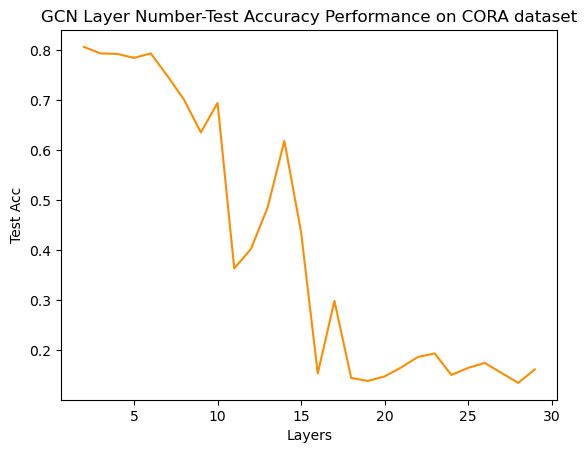

In [12]:
layers, acc = gcn_layer_performance.keys(), gcn_layer_performance.values()
plt.plot(layers, acc, color = 'darkorange')
plt.title('GCN Layer Number-Test Accuracy Performance on CORA dataset')
plt.xlabel('Layers')
plt.ylabel('Test Acc')
plt.show()